## Comparing WIS of our log-normals approach with COVIDhub methodology robust untrained.

### Calculating WIS for log-normals

Here we take the lognormals obtained in the notebooks *log_normal_parameters_KL_deaths* and *log_normal_parameters_CDF_deaths* and calculate the WIS.

In [1]:
import pandas as pd
import numpy as np
from epiweeks import Week
from numpy import log, exp
from scipy.stats import lognorm
from scipy.optimize import minimize
from matplotlib import use, get_backend
import aux_functions

import mosqlient as mosq
from itertools import product 
from mosqlient.scoring import compute_wis

from numpy.typing import NDArray

#use('TkAgg', force=True)
from matplotlib import pyplot as plt
#print("Switched to:", get_backend())

In [2]:
df_CDF = pd.read_csv('results/preds_CDF_death_weights_equal_v3.csv')
df_KL = pd.read_csv('results/preds_KL_death_v3.csv')

df_CDF.head()

,model,forecast_date,target_end_date,horizon,lower_95,upper_95,lower_50,upper_50,lower_98,lower_90,...,upper_30,upper_40,upper_60,upper_70,upper_80,upper_90,upper_98,value,mu,sigma
0,AIpert-pwllnod,2021-07-19,2021-07-31,1,595.955733,4341.901891,1521.826927,2810.933415,428.091306,822.916022,...,2466.539847,2632.180792,3009.982937,3241.999466,3533.929238,3966.613137,4778.256172,2571.0,7.627476,0.454140
1,AIpert-pwllnod,2021-07-19,2021-08-07,2,482.710172,5682.092035,1566.049852,3355.332615,342.360199,748.270963,...,2831.924726,3083.665134,3657.847238,4010.464978,4454.138612,5111.729773,6345.261427,3668.0,7.718169,0.558158
2,AIpert-pwllnod,2021-07-19,2021-08-14,3,404.932573,7807.806832,1660.787331,4208.366189,281.569183,712.782261,...,3398.666823,3788.103155,4676.349006,5221.840136,5908.192535,6925.470183,8833.713869,4661.0,7.843916,0.679365
3,AIpert-pwllnod,2021-07-19,2021-08-21,4,352.113552,11195.813238,1810.056893,5541.739899,230.007093,709.501538,...,4269.847943,4881.582321,6276.856667,7133.725041,8211.861115,9809.821186,12807.328527,7304.0,8.010528,0.800023
4,AIpert-pwllnod,2021-07-26,2021-08-07,1,649.222301,3820.828929,1459.009347,2550.466220,466.013035,847.726697,...,2264.696295,2402.141372,2715.632972,2908.154993,3150.391657,3509.422884,4182.905755,3668.0,7.558697,0.413585


In [3]:
len(np.array(df_CDF['model']))

10933

In [4]:
df_KL.head()

,model,forecast_date,target_end_date,horizon,lower_95,upper_95,lower_50,upper_50,lower_98,lower_90,...,upper_30,upper_40,upper_60,upper_70,upper_80,upper_90,upper_98,value,mu,sigma
0,AIpert-pwllnod,2021-07-19,2021-07-31,1,595.955733,4341.901891,1521.826927,2810.933415,428.091306,822.916022,...,2466.539847,2632.180792,3009.982937,3241.999466,3533.929238,3966.613137,4778.256172,2571.0,7.370375,0.452684
1,AIpert-pwllnod,2021-07-19,2021-08-07,2,482.710172,5682.092035,1566.049852,3355.332615,342.360199,748.270963,...,2831.924726,3083.665134,3657.847238,4010.464978,4454.138612,5111.729773,6345.261427,3668.0,7.406262,0.550544
2,AIpert-pwllnod,2021-07-19,2021-08-14,3,404.932573,7807.806832,1660.787331,4208.366189,281.569183,712.782261,...,3398.666823,3788.103155,4676.349006,5221.840136,5908.192535,6925.470183,8833.713869,4661.0,7.477282,0.652295
3,AIpert-pwllnod,2021-07-19,2021-08-21,4,352.113552,11195.813238,1810.056893,5541.739899,230.007093,709.501538,...,4269.847943,4881.582321,6276.856667,7133.725041,8211.861115,9809.821186,12807.328527,7304.0,7.583561,0.760635
4,AIpert-pwllnod,2021-07-26,2021-08-07,1,649.222301,3820.828929,1459.009347,2550.466220,466.013035,847.726697,...,2264.696295,2402.141372,2715.632972,2908.154993,3150.391657,3509.422884,4182.905755,3668.0,7.327829,0.409190


In [5]:
df_CDF.isnull().sum()

model              0
forecast_date      0
target_end_date    0
horizon            0
lower_95           0
upper_95           0
lower_50           0
upper_50           0
lower_98           0
lower_90           0
lower_80           0
lower_70           0
lower_60           0
lower_40           0
lower_30           0
lower_20           0
lower_10           0
pred               0
upper_10           0
upper_20           0
upper_30           0
upper_40           0
upper_60           0
upper_70           0
upper_80           0
upper_90           0
upper_98           0
value              0
mu                 4
sigma              0
dtype: int64

In [6]:
df_KL.isnull().sum()

model              0
forecast_date      0
target_end_date    0
horizon            0
lower_95           0
upper_95           0
lower_50           0
upper_50           0
lower_98           0
lower_90           0
lower_80           0
lower_70           0
lower_60           0
lower_40           0
lower_30           0
lower_20           0
lower_10           0
pred               0
upper_10           0
upper_20           0
upper_30           0
upper_40           0
upper_60           0
upper_70           0
upper_80           0
upper_90           0
upper_98           0
value              0
mu                 0
sigma              0
dtype: int64

In [7]:
df_CDF = df_CDF.dropna()
df_CDF = df_CDF.reset_index(drop=True)

#df_KL = df_KL.dropna()
#df_KL = df_KL.reset_index(drop=True)

print("CDF_len:", len(df_CDF))
print("KL_len:", len(df_KL))

CDF_len: 10929
KL_len: 10933


In [8]:
horizons = df_KL.horizon.unique()
target_end_dates = df_KL.target_end_date.unique()
print(horizons)
print(target_end_dates)

[1 2 3 4]
['2021-07-31' '2021-08-07' '2021-08-14' '2021-08-21' '2021-08-28'
 '2021-09-04' '2021-09-11' '2021-09-18' '2021-09-25' '2021-10-02'
 '2021-10-09' '2021-10-16' '2021-10-23' '2021-10-30' '2021-11-06'
 '2021-11-13' '2021-11-20' '2021-11-27' '2021-12-04' '2021-12-11'
 '2021-12-18' '2021-12-25' '2022-01-01' '2022-01-08' '2022-01-15'
 '2022-01-22' '2022-01-29' '2022-02-05' '2022-02-12' '2022-02-19'
 '2022-02-26' '2022-03-05' '2022-03-12' '2022-03-19' '2022-03-26'
 '2022-04-02' '2022-04-09' '2022-04-16' '2020-10-17' '2020-10-24'
 '2020-10-31' '2020-11-07' '2020-11-14' '2020-11-21' '2020-11-28'
 '2020-12-05' '2020-12-12' '2020-12-19' '2020-12-26' '2021-01-02'
 '2021-01-09' '2021-01-16' '2021-01-23' '2021-01-30' '2021-02-06'
 '2021-02-13' '2021-02-20' '2021-02-27' '2021-03-06' '2021-03-13'
 '2021-03-20' '2021-03-27' '2021-04-03' '2021-04-10' '2021-04-17'
 '2021-04-24' '2021-05-01' '2021-05-08' '2021-05-15' '2021-05-22'
 '2021-05-29' '2021-06-05' '2021-06-12' '2021-06-19' '2021-06-26'


### Making the pool of log-normals

In [9]:
def pool_par_gauss(
    alpha: NDArray[np.float64], m: NDArray[np.float64], v: NDArray[np.float64]
) -> tuple:
    """
    Function to get the output distribution from a logarithmic pool of lognormal (or normal) distrutions

    Parameters
    ----------
    alpha : array of float
        Weigths assigned to each distribution in the pool.
    m : array of float
        mu parameter
    v : array of float
        variance parameter
    Returns
    -------
    tuple
        A tuple containing two elements. The first one is the mu and the second one the sd parameter of the distribution.

    Notes
    ------
    The logarithmic pooling method is based on the work of Carvalho, L. M., Villela, D. A., Coelho, F. C., & Bastos, L. S. (2023).
    Bayesian inference for the weights in logarithmic pooling. Bayesian Analysis, 18(1), 223-251.
    ------
    Implementation from: https://github.com/Mosqlimate-project/Ensemble-methods/blob/fce544fef28cb959498f0383d3110fb8596697d6/methods/ensemble.py#L75
    """
    if not (len(alpha) == len(m) == len(v)):
        raise ValueError(
            "The arrays 'alpha', 'm', and 'v' must have the same length."
        )

    ws = alpha / v
    vstar = 1 / np.sum(ws)
    mstar = np.sum(ws * m) * vstar
    return mstar, np.sqrt(vstar)

In [10]:
df_logs_pool = pd.DataFrame()

for horizon, end_date in product(horizons,target_end_dates):
    aux = df_KL.loc[(df_KL.target_end_date == end_date) & (df_KL.horizon==horizon)]
    KL_mus = aux.mu.to_numpy()
    KL_sigmas = aux.sigma.to_numpy()
    KL_weights = np.ones(len(KL_mus))/len(KL_mus)
    value = aux.value.to_numpy()
    
    mu_KL, sigma_KL =  pool_par_gauss(KL_weights, KL_mus, KL_sigmas)
    
    aux = df_CDF.loc[(df_CDF.target_end_date == end_date) & (df_CDF.horizon==horizon)]
    CDF_mus = aux.mu.to_numpy()
    CDF_sigmas = aux.sigma.to_numpy()
    CDF_weights = np.ones(len(CDF_mus))/len(CDF_mus)

    mu_CDF, sigma_CDF =  pool_par_gauss(CDF_weights, CDF_mus, CDF_sigmas)

    if len(value) != 0:
        value = value[0]
        df_logs_pool = pd.concat([df_logs_pool,
                               pd.DataFrame([[end_date, horizon, value, mu_KL, sigma_KL, mu_CDF, sigma_CDF]],
                                columns = ['target_end_date', 'horizon', 'value', 'mu_KL', 'sigma_KL', 'mu_CDF', 'sigma_CDF'] 
                                )], ignore_index = True)
df_logs_pool

C:\Users\alp19\AppData\Local\Temp\ipykernel_1960\2136054426.py:33: RuntimeWarning: divide by zero encountered in scalar divide
  vstar = 1 / np.sum(ws)
C:\Users\alp19\AppData\Local\Temp\ipykernel_1960\2136054426.py:34: RuntimeWarning: invalid value encountered in scalar multiply
  mstar = np.sum(ws * m) * vstar


,target_end_date,horizon,value,mu_KL,sigma_KL,mu_CDF,sigma_CDF
0,2021-07-31,1,2571.0,7.435376,0.000222,7.717965,0.488215
1,2021-08-07,1,3668.0,7.654303,0.228584,7.869784,0.471179
2,2021-08-14,1,4661.0,7.927929,0.000190,7.902071,0.449134
3,2021-08-21,1,7304.0,8.335182,0.222773,8.329419,0.465145
4,2021-08-28,1,9154.0,8.474260,0.377640,8.584684,0.493790
...,...,...,...,...,...,...,...
379,2020-07-18,4,5567.0,8.312420,0.387704,8.348219,0.508315
380,2020-07-25,4,6461.0,8.263711,0.407815,8.450208,0.552327
381,2020-08-01,4,7895.0,8.416941,0.431065,8.495665,0.501311
382,2020-08-08,4,7264.0,8.288331,0.463798,8.274269,0.597036


In [11]:
# Probabilities for which to compute quantiles
quantile_probs = [0.01, 0.025,
                  0.05, 0.1, 0.15,
                  0.2, 0.25, 0.3,
                  0.35, 0.4, 0.45,
                  0.5,
                  0.55, 0.6, 0.65,
                  0.7, 0.75, 0.8,
                  0.85, 0.9, 0.95,
                  0.975, 0.99]

quantile_names = ['lower_98', 'lower_95',
                  'lower_90', 'lower_80', 'lower_70',
                  'lower_60', 'lower_50', 'lower_40',
                  'lower_30', 'lower_20', 'lower_10',
                  'pred',
                  'upper_10', 'upper_20', 'upper_30',
                  'upper_40', 'upper_50', 'upper_60',
                  'upper_70', 'upper_80', 'upper_90',
                  'upper_95', 'upper_98']

# Compute quantiles and add as new columns
for i in range(0,len(quantile_probs)):
    df_logs_pool[quantile_names[i]] = df_logs_pool.apply(lambda row: lognorm.ppf(quantile_probs[i], s=row['sigma_KL'], scale=np.exp(row['mu_KL'])), axis=1)
KL_wis = compute_wis(df_logs_pool,df_logs_pool.value.to_numpy())
df_logs_pool['KL_WIS'] = KL_wis

rename_map = {col: f"KL_{col}" for col in quantile_names}
df_logs_pool.rename(columns=rename_map, inplace=True)

for i in range(0,len(quantile_probs)):
    df_logs_pool[quantile_names[i]] = df_logs_pool.apply(lambda row: lognorm.ppf(quantile_probs[i], s=row['sigma_CDF'], scale=np.exp(row['mu_CDF'])), axis=1)
CDF_wis = compute_wis(df_logs_pool,df_logs_pool.value.to_numpy())
df_logs_pool['CDF_WIS'] = CDF_wis

rename_map = {col: f"CDF_{col}" for col in quantile_names}
df_logs_pool.rename(columns=rename_map, inplace=True)

df_logs_pool

,target_end_date,horizon,value,mu_KL,sigma_KL,mu_CDF,sigma_CDF,KL_lower_98,KL_lower_95,KL_lower_90,...,CDF_upper_30,CDF_upper_40,CDF_upper_50,CDF_upper_60,CDF_upper_70,CDF_upper_80,CDF_upper_90,CDF_upper_95,CDF_upper_98,CDF_WIS
0,2021-07-31,1,2571.0,7.435376,0.000222,7.717965,0.488215,1694.022432,1694.159921,1694.278179,...,2713.744056,2904.409707,3125.223930,3390.922404,3729.268613,4203.352501,5019.105934,5853.813422,7000.400105,275.106165
1,2021-08-07,1,3668.0,7.654303,0.228584,7.869784,0.471179,1239.589901,1347.876298,1448.544926,...,3137.993753,3350.518951,3596.043180,3890.676113,4264.710605,4786.832093,5680.555883,6589.796328,7831.505734,538.033320
2,2021-08-14,1,4661.0,7.927929,0.000190,7.902071,0.449134,2772.447439,2772.640788,2772.807089,...,3213.551717,3420.690361,3659.229503,3944.479788,4305.158219,4806.190894,5658.032704,6518.231555,7684.141476,1065.015273
3,2021-08-21,1,7304.0,8.335182,0.222773,8.329419,0.465145,2482.284764,2693.387956,2889.252900,...,4957.460098,5288.771101,5671.191079,6129.661492,6711.049962,7521.539937,8906.301077,10312.234457,12228.296056,1720.471435
4,2021-08-28,1,9154.0,8.474260,0.377640,8.584684,0.493790,1989.697628,2284.949621,2573.694263,...,6470.131066,6930.089564,7463.207934,8105.260030,8923.690383,10071.871590,12050.926734,14079.783690,16872.022578,2005.844539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,2020-07-18,4,5567.0,8.312420,0.387704,8.348219,0.508315,1653.228333,1905.564931,2153.184969,...,5136.273134,5512.532883,5949.557235,6477.095773,7151.328541,8100.253616,9743.176802,11435.728307,13776.729610,736.637761
380,2020-07-25,4,6461.0,8.263711,0.407815,8.450208,0.552327,1502.659832,1744.823586,1984.089371,...,5785.039932,6246.947197,6786.879070,7443.211374,8288.776417,9490.465768,11599.350966,13804.477986,16900.727384,953.340305
381,2020-08-01,4,7895.0,8.416941,0.431065,8.495665,0.501311,1659.272423,1943.157849,2225.868979,...,5936.236922,6364.895263,6862.275994,7462.004050,8227.527109,9303.269875,11161.755665,13071.856427,15707.429760,1542.440061
382,2020-08-08,4,7264.0,8.288331,0.463798,8.274269,0.597036,1352.045799,1602.471499,1854.647799,...,4936.041239,5363.406990,5866.205784,6481.756423,7281.241289,8428.726359,10470.376733,12637.671628,15727.746679,1730.227515


### Comparing to COVID_4weeks model and ensemble using robust untrained methodology

In [12]:
df_4weeks_WIS =  pd.read_csv("results/comparison_4weeks_WIS_death_v3.csv")

df_4weeks_WIS.forecast_date = pd.to_datetime(df_4weeks_WIS.forecast_date)
df_4weeks_WIS.target_end_date = pd.to_datetime(df_4weeks_WIS.target_end_date)

df_4weeks_WIS.head()

,Unnamed: 0,target_end_date,model,horizon,forecast_date,wis_COVIDhub,y,lower_98_COVIDhub,lower_95_COVIDhub,lower_90_COVIDhub,...,upper_30_calculated,upper_40_calculated,upper_50_calculated,upper_60_calculated,upper_70_calculated,upper_80_calculated,upper_90_calculated,upper_95_calculated,upper_98_calculated,wis_calculated
0,0,2020-06-20,COVIDhub-4_week_ensemble,1,2020-06-08,1096.222806,4150.0,4192.586346,4386.786431,4592.840585,...,5269.058938,5443.533100,5920.880744,6059.759956,6220.848925,6407.199732,6679.167733,6944.270268,7746.782128,478.721553
1,1,2020-06-27,COVIDhub-4_week_ensemble,1,2020-06-15,627.193827,3865.0,3552.442503,3702.651719,3904.707491,...,5127.327358,5218.644103,5337.747119,5455.897697,5623.893424,5807.870480,5985.024082,6155.740782,6343.097031,590.166110
2,2,2020-06-27,COVIDhub-4_week_ensemble,2,2020-06-08,1033.442342,3865.0,3717.985802,3893.134537,4125.763798,...,4822.025809,5021.614892,5247.969635,5523.179032,5841.616016,6263.940378,6988.268599,7494.523865,7838.523052,339.775914
3,3,2020-07-04,COVIDhub-4_week_ensemble,1,2020-06-22,167.775616,3682.0,2679.983604,2809.019540,2957.335159,...,4476.299668,4591.250168,4682.923826,4790.914982,4897.076545,5002.829046,5233.166321,5432.962373,5651.554272,283.975891
4,4,2020-07-04,COVIDhub-4_week_ensemble,2,2020-06-15,642.443695,3682.0,3143.270625,3340.465160,3552.218407,...,5129.757433,5262.298217,5357.945566,5466.430745,5600.414814,5793.346337,6050.076593,6270.388635,6538.705481,605.906672


In [13]:
columns_to_exclude = ['Unnamed: 0', 'forecast_date', 'model']
df_4weeks_WIS = df_4weeks_WIS.drop(columns=columns_to_exclude)
df_4weeks_WIS
#df_4weeks_WIS = df_4weeks_WIS.drop_duplicates()

,target_end_date,horizon,wis_COVIDhub,y,lower_98_COVIDhub,lower_95_COVIDhub,lower_90_COVIDhub,lower_80_COVIDhub,lower_70_COVIDhub,lower_60_COVIDhub,...,upper_30_calculated,upper_40_calculated,upper_50_calculated,upper_60_calculated,upper_70_calculated,upper_80_calculated,upper_90_calculated,upper_95_calculated,upper_98_calculated,wis_calculated
0,2020-06-20,1,1096.222806,4150.0,4192.586346,4386.786431,4592.840585,4819.626987,4974.223759,5124.842101,...,5269.058938,5443.533100,5920.880744,6059.759956,6220.848925,6407.199732,6679.167733,6944.270268,7746.782128,478.721553
1,2020-06-27,1,627.193827,3865.0,3552.442503,3702.651719,3904.707491,4109.553631,4256.332343,4365.428314,...,5127.327358,5218.644103,5337.747119,5455.897697,5623.893424,5807.870480,5985.024082,6155.740782,6343.097031,590.166110
2,2020-06-27,2,1033.442342,3865.0,3717.985802,3893.134537,4125.763798,4380.737749,4570.166569,4730.929302,...,4822.025809,5021.614892,5247.969635,5523.179032,5841.616016,6263.940378,6988.268599,7494.523865,7838.523052,339.775914
3,2020-07-04,1,167.775616,3682.0,2679.983604,2809.019540,2957.335159,3143.215735,3282.840098,3403.545895,...,4476.299668,4591.250168,4682.923826,4790.914982,4897.076545,5002.829046,5233.166321,5432.962373,5651.554272,283.975891
4,2020-07-04,2,642.443695,3682.0,3143.270625,3340.465160,3552.218407,3801.157639,3976.372273,4102.684650,...,5129.757433,5262.298217,5357.945566,5466.430745,5600.414814,5793.346337,6050.076593,6270.388635,6538.705481,605.906672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,2022-04-02,3,786.703478,4512.0,1599.000000,1998.000000,2484.000000,3072.000000,3617.000000,3879.000000,...,7148.244043,7246.551465,7763.528398,8482.306370,9535.065205,10122.500000,10669.849805,11093.026465,11359.550749,797.297798
368,2022-04-02,4,1228.288696,4512.0,2270.000000,2538.000000,3034.000000,3742.000000,4327.000000,4608.000000,...,7567.767300,7870.947800,8652.677141,9346.575579,9935.515450,10498.592447,12720.394089,14314.677725,15464.065260,1195.578965
369,2022-04-09,3,661.452609,3902.0,1257.000000,1964.000000,2153.000000,2655.000000,3095.000000,3295.000000,...,6046.818142,6484.666510,6956.838309,7365.874529,8292.548506,9194.745307,10490.807250,11002.586688,12137.607321,666.851446
370,2022-04-09,4,789.432609,3902.0,841.000000,1148.000000,1635.000000,2166.000000,2428.000000,2677.000000,...,6600.627576,7064.642754,7517.845774,8198.995448,9310.288865,10145.846131,10489.500000,10614.063433,11450.000024,803.349601


In [14]:
len(df_4weeks_WIS)

372

In [15]:
len(df_logs_pool)

384

In [16]:
df_logs_pool.target_end_date = pd.to_datetime(df_logs_pool.target_end_date)
merged_df = pd.merge(df_logs_pool, df_4weeks_WIS, on=['target_end_date', 'horizon'], how='inner')  # Options: 'inner', 'outer', 'left', 'right'

In [17]:
merged_df

,target_end_date,horizon,value,mu_KL,sigma_KL,mu_CDF,sigma_CDF,KL_lower_98,KL_lower_95,KL_lower_90,...,upper_30_calculated,upper_40_calculated,upper_50_calculated,upper_60_calculated,upper_70_calculated,upper_80_calculated,upper_90_calculated,upper_95_calculated,upper_98_calculated,wis_calculated
0,2021-07-31,1,2571.0,7.435376,0.000222,7.717965,0.488215,1694.022432,1694.159921,1694.278179,...,2164.000000,2212.000000,2343.000000,2422.000000,2535.000000,2663.000000,2835.250000,3008.325000,3194.083968,318.644726
1,2021-08-07,1,3668.0,7.654303,0.228584,7.869784,0.471179,1239.589901,1347.876298,1448.544926,...,2352.117543,2430.843991,2552.733110,2695.316486,2865.577497,2985.487965,3169.956615,3360.985000,3590.605000,1030.794480
2,2021-08-14,1,4661.0,7.927929,0.000190,7.902071,0.449134,2772.447439,2772.640788,2772.807089,...,3021.439864,3127.664744,3267.126305,3468.000000,3641.000000,3883.000000,4171.000000,4298.000000,4432.000000,1290.645102
3,2021-08-21,1,7304.0,8.335182,0.222773,8.329419,0.465145,2482.284764,2693.387956,2889.252900,...,4354.000000,4422.682170,4553.000000,4750.927194,4960.050046,5324.582191,5675.565479,5932.875739,6532.000000,2579.081556
4,2021-08-28,1,9154.0,8.474260,0.377640,8.584684,0.493790,1989.697628,2284.949621,2573.694263,...,6087.691850,6182.540603,6350.571469,6541.652215,6734.865980,7010.839046,7405.581660,7831.602149,8319.860717,2749.559892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,2020-07-18,4,5567.0,8.312420,0.387704,8.348219,0.508315,1653.228333,1905.564931,2153.184969,...,4695.572270,4847.500000,5006.889746,5155.027573,5399.187104,5667.437411,6157.510747,6542.105971,7062.826734,707.728265
368,2020-07-25,4,6461.0,8.263711,0.407815,8.450208,0.552327,1502.659832,1744.823586,1984.089371,...,4358.217952,4450.720901,4589.467072,5085.256983,5480.208950,5809.751426,6227.205206,6931.518003,7469.045708,1503.141138
369,2020-08-01,4,7895.0,8.416941,0.431065,8.495665,0.501311,1659.272423,1943.157849,2225.868979,...,6130.374383,6358.203406,6678.512457,7266.766490,7771.488696,8158.425118,8933.537051,9966.748948,10769.323657,1311.908256
370,2020-08-08,4,7264.0,8.288331,0.463798,8.274269,0.597036,1352.045799,1602.471499,1854.647799,...,4991.380167,5499.683683,5882.000000,6005.000000,6146.000000,6393.306711,7069.437016,7672.546887,8655.570000,1537.251345


In [18]:
sum(merged_df['y']==merged_df['value'])

372

In [19]:
merged_df = merged_df.drop(columns='value')

In [20]:
pd.set_option('display.max_rows', None)
print(merged_df.isnull().sum())
pd.reset_option('display.max_rows')

target_end_date        0
horizon                0
mu_KL                  0
sigma_KL               0
mu_CDF                 0
sigma_CDF              0
KL_lower_98            0
KL_lower_95            0
KL_lower_90            0
KL_lower_80            0
KL_lower_70            0
KL_lower_60            0
KL_lower_50            0
KL_lower_40            0
KL_lower_30            0
KL_lower_20            0
KL_lower_10            0
KL_pred                0
KL_upper_10            0
KL_upper_20            0
KL_upper_30            0
KL_upper_40            0
KL_upper_50            0
KL_upper_60            0
KL_upper_70            0
KL_upper_80            0
KL_upper_90            0
KL_upper_95            0
KL_upper_98            0
KL_WIS                 0
CDF_lower_98           0
CDF_lower_95           0
CDF_lower_90           0
CDF_lower_80           0
CDF_lower_70           0
CDF_lower_60           0
CDF_lower_50           0
CDF_lower_40           0
CDF_lower_30           0
CDF_lower_20           0


In [21]:
#merged_df.isnull().sum()
#merged_df = merged_df.dropna()
#merged_df = merged_df.reset_index(drop=True)
#merged_df

In [22]:
print(np.array(merged_df.columns))

['target_end_date' 'horizon' 'mu_KL' 'sigma_KL' 'mu_CDF' 'sigma_CDF'
 'KL_lower_98' 'KL_lower_95' 'KL_lower_90' 'KL_lower_80' 'KL_lower_70'
 'KL_lower_60' 'KL_lower_50' 'KL_lower_40' 'KL_lower_30' 'KL_lower_20'
 'KL_lower_10' 'KL_pred' 'KL_upper_10' 'KL_upper_20' 'KL_upper_30'
 'KL_upper_40' 'KL_upper_50' 'KL_upper_60' 'KL_upper_70' 'KL_upper_80'
 'KL_upper_90' 'KL_upper_95' 'KL_upper_98' 'KL_WIS' 'CDF_lower_98'
 'CDF_lower_95' 'CDF_lower_90' 'CDF_lower_80' 'CDF_lower_70'
 'CDF_lower_60' 'CDF_lower_50' 'CDF_lower_40' 'CDF_lower_30'
 'CDF_lower_20' 'CDF_lower_10' 'CDF_pred' 'CDF_upper_10' 'CDF_upper_20'
 'CDF_upper_30' 'CDF_upper_40' 'CDF_upper_50' 'CDF_upper_60'
 'CDF_upper_70' 'CDF_upper_80' 'CDF_upper_90' 'CDF_upper_95'
 'CDF_upper_98' 'CDF_WIS' 'wis_COVIDhub' 'y' 'lower_98_COVIDhub'
 'lower_95_COVIDhub' 'lower_90_COVIDhub' 'lower_80_COVIDhub'
 'lower_70_COVIDhub' 'lower_60_COVIDhub' 'lower_50_COVIDhub'
 'lower_40_COVIDhub' 'lower_30_COVIDhub' 'lower_20_COVIDhub'
 'lower_10_COVIDhub'

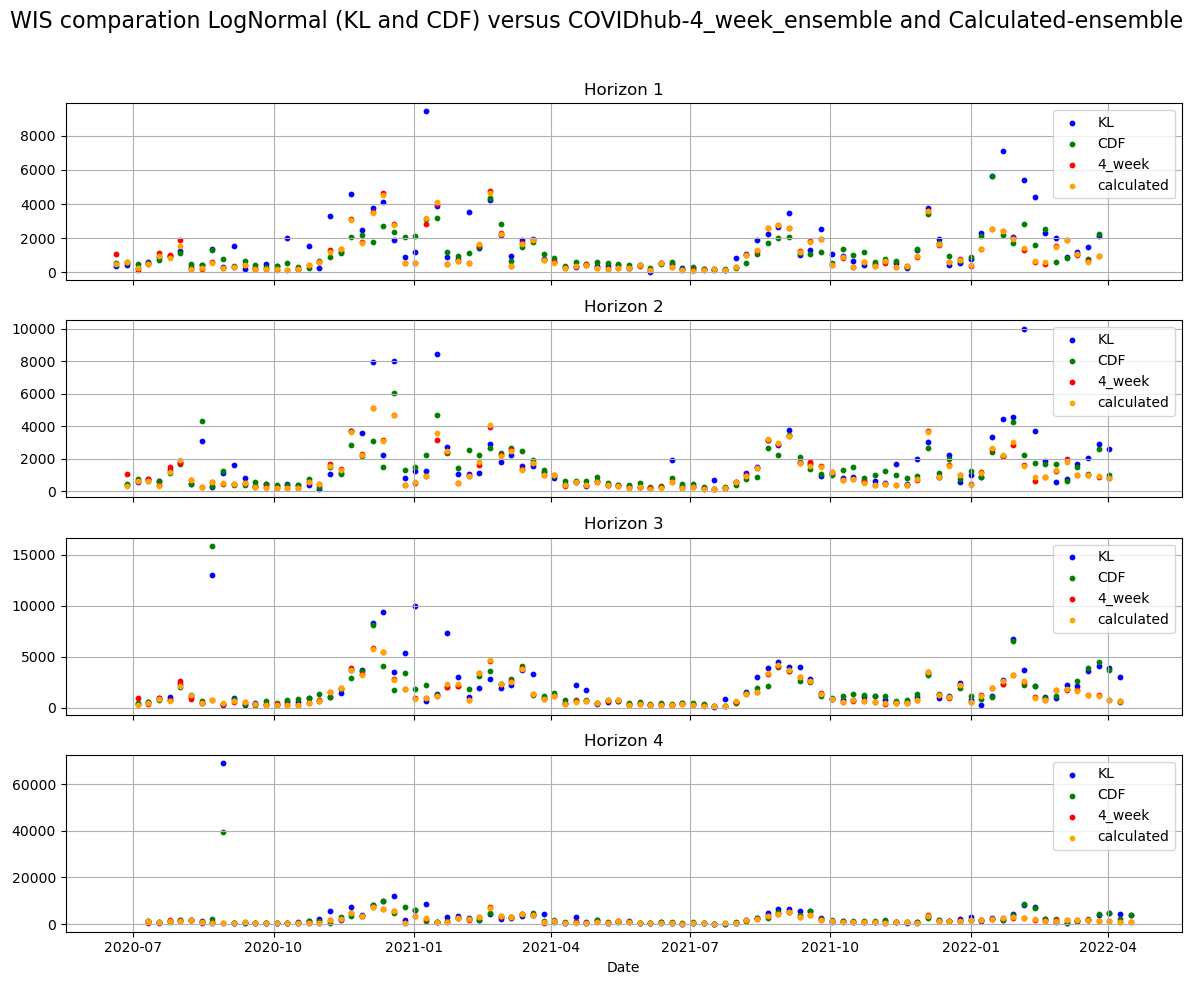

In [23]:
fig, axs = plt.subplots(4, 1, figsize=(12, 10), sharex=True)
fig.suptitle('WIS comparation LogNormal (KL and CDF) versus COVIDhub-4_week_ensemble and Calculated-ensemble', fontsize=16)

for i, cat in enumerate([1, 2, 3, 4]):
    ax = axs[i]
    df_cat = merged_df[merged_df['horizon'] == cat]
    
    ax.scatter(df_cat['target_end_date'], df_cat['KL_WIS'], label='KL', color='blue', s=10)
    ax.scatter(df_cat['target_end_date'], df_cat['CDF_WIS'], label='CDF', color='green', s=10)
    ax.scatter(df_cat['target_end_date'], df_cat['wis_COVIDhub'], label='4_week', color='red', s=10)
    ax.scatter(df_cat['target_end_date'], df_cat['wis_calculated'], label='calculated', color='orange', s=10)
    
    ax.set_title(f'Horizon {cat}')
    ax.legend()
    ax.grid(True)

# Format x-axis
plt.xlabel('Date')
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the main title
plt.savefig('first_draft_death.png', dpi=300, bbox_inches='tight')
plt.show()

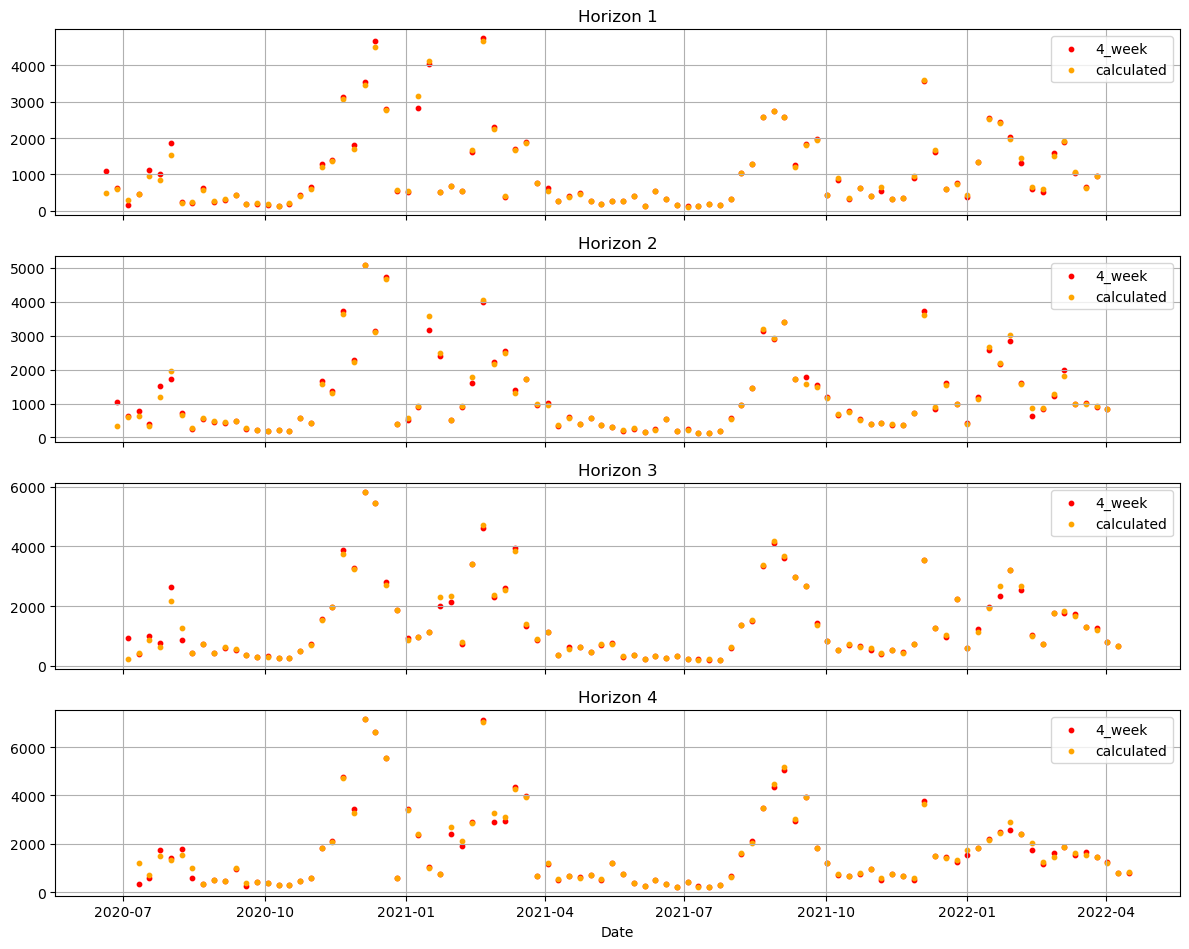

In [24]:
fig, axs = plt.subplots(4, 1, figsize=(12, 10), sharex=True)
for i, cat in enumerate([1, 2, 3, 4]):
    ax = axs[i]
    df_cat = merged_df[merged_df['horizon'] == cat]
    
    #ax.scatter(df_cat['target_end_date'], df_cat['KL_WIS'], label='KL', color='blue', s=10)
    #ax.scatter(df_cat['target_end_date'], df_cat['CDF_WIS'], label='CDF', color='green', s=10)
    ax.scatter(df_cat['target_end_date'], df_cat['wis_COVIDhub'], label='4_week', color='red', s=10)
    ax.scatter(df_cat['target_end_date'], df_cat['wis_calculated'], label='calculated', color='orange', s=10)
   
    ax.set_title(f'Horizon {cat}')
    ax.legend()
    ax.grid(True)

# Format x-axis
plt.xlabel('Date')
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the main title
plt.savefig('second_draft_death.png', dpi=300, bbox_inches='tight')
plt.show()

In [25]:
def summarize_columns(df, columns):
    summary = pd.DataFrame(columns=["Mean", "Std Dev", "Min", "25%", "Median", "75%", "Max", "Sum"])
    
    for col in columns:
        if col in df.columns:
            stats = {
                "Mean": df[col].mean(),
                "Std Dev": df[col].std(),
                "Min": df[col].min(),
                "25%": df[col].quantile(0.25),
                "Median": df[col].median(),
                "75%": df[col].quantile(0.75),
                "Max": df[col].max(),
                "Sum": df[col].sum()
            }
            summary.loc[col] = stats
        else:
            print(f"Column '{col}' not found in DataFrame.")
    
    print(summary.round(3))

summarize_columns(merged_df, ['CDF_WIS','KL_WIS','wis_COVIDhub','wis_calculated'])

                    Mean   Std Dev      Min      25%    Median       75%  \
CDF_WIS         1750.917  2552.282  137.734  614.635  1170.377  2146.370   
KL_WIS          2125.334  4080.539   14.568  552.472  1110.429  2601.128   
wis_COVIDhub    1346.241  1283.375  117.887  433.857   828.287  1819.246   
wis_calculated  1346.825  1286.096  115.955  431.111   828.896  1815.618   

                      Max         Sum  
CDF_WIS         39362.623  651341.178  
KL_WIS          69292.510  790624.133  
wis_COVIDhub     7185.643  500801.610  
wis_calculated   7150.610  501018.746  


In [26]:
merged_df.to_csv("results/merged_df_wis_death.csv")